In [1]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import rpy2.robjects as robj
import pyreadr
%matplotlib inline
from easydict import EasyDict as edict
from tqdm import tqdm_notebook as tqdm
import sys
import time as Time
import pickle
from numpy.linalg import inv
from pathlib import Path
from scipy.io import loadmat
from easydict import EasyDict as edict
from scipy.signal import detrend

In [2]:
sys.path.append("/home/huaqingj/MyResearch/TVDN")
from pyTVDN.TVDNutils import *
from pyTVDN import TVDNDetect
from pyTVDN.Rfuns import decimate_R
from pyTVDN.TVDNclass import TVDNDetect
from pyTVDN.TVDNKappaTuning import TVDNKappaTuningCV

In [3]:
resDir = Path("../results")
dataDir = Path("../data")
filname = Path("subj2.mat")
MEG = loadmat(dataDir/filname)["DK_timecourse"]
Ymat = MEG

In [4]:
kappas = np.linspace(2, 3.5, 100)

In [5]:
res = TVDNKappaTuningCV(kappas, Ymat, numFold=180, randomSel=False, numTimes=None, wh=30, dataType="MEG", saveDir=None, r=8, MaxM=30)

R[write to console]: 
Attaching package: ‘signal’


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, poly




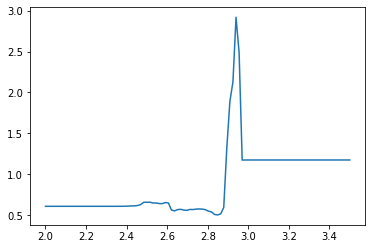

In [6]:
plt.plot(kappas, res.MSEs)

In [8]:
res.bestKappa

2.8484848484848486

### Detect under the kappa obtained from `TVDNKappaTuningCV`

In [9]:
MEGdet = TVDNDetect(Ymat=Ymat, saveDir=None, dataType="MEG", fName="subj2", r=8, kappa=res["bestKappa"], freq=60, MaxM=30)

The parameters for detection are:
{'Lmin': 60,
 'MaxM': 30,
 'T': 2,
 'decimateRate': 10,
 'downRate': 20,
 'fName': 'subj2',
 'fct': 0.5,
 'freq': 60,
 'is_detrend': False,
 'kappa': 2.8484848484848486,
 'lamb': 0.0001,
 'plotfct': 30,
 'r': 8}


In [10]:
MEGdet.Screening(wh=30)

In [11]:
MEGdet()

In [12]:
print(MEGdet)

+-------------+------------------------------------------------------------------------+---------------------+------+
| Num of CPTs |                             Estiamted CPTs                             |         MSE         | Rank |
+-------------+------------------------------------------------------------------------+---------------------+------+
|      15     | [ 163  357  519  768 1053 1287 1497 1598 1842 2105 2477 2671 2899 3082 | 0.46851642323011744 |  8   |
|             |                                  3386]                                 |                     |      |
+-------------+------------------------------------------------------------------------+---------------------+------+


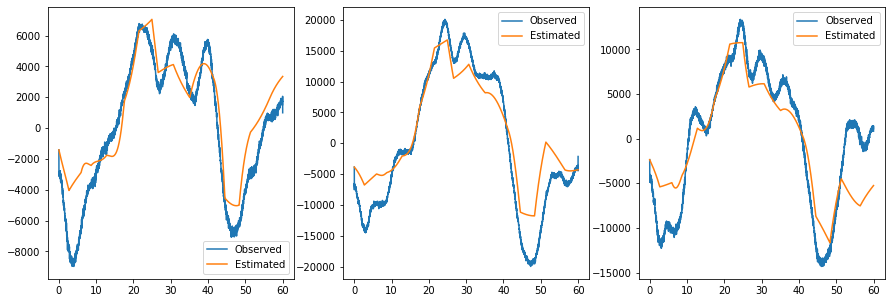

In [13]:
MEGdet.PlotRecCurve([43, 44, 59])

### The results under the `kappa`  from the MSE errors

In [14]:
MEGdet.TuningKappa(kappas)

In [15]:
MEGdet.optKappa

2.8636363636363638

In [16]:
MEGdet.UpdateEcpts()
print(MEGdet)

+-------------+--------------------------------------------------------------------------+-------------------+------+
| Num of CPTs |                              Estiamted CPTs                              |        MSE        | Rank |
+-------------+--------------------------------------------------------------------------+-------------------+------+
|      14     | [ 196.  519.  768. 1053. 1287. 1497. 1598. 1842. 2105. 2477. 2671. 2899. | 0.428335587675283 |  8   |
|             |                               3082. 3386.]                               |                   |      |
+-------------+--------------------------------------------------------------------------+-------------------+------+


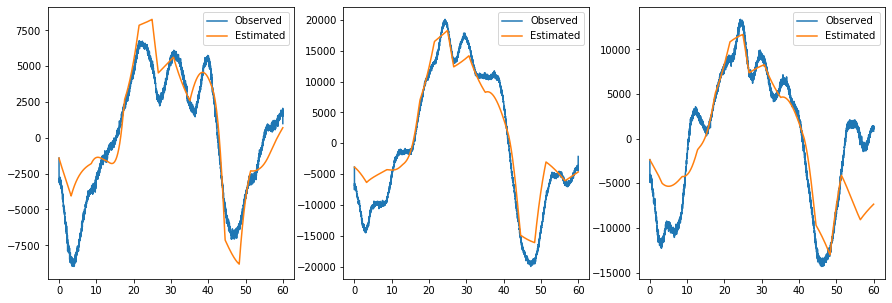

In [17]:
MEGdet.PlotRecCurve([43, 44, 59])